In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import MultipleLocator

In [2]:
def API(list_ = []):

    if not(np.any(list_)):
        return 1
    else:

        result = smt.stattools.acf(list_,adjusted=True)[1]

        return result

In [3]:
def cartesian_coord(*arrays):
    grid = np.meshgrid(*arrays)
    coord_list = [entry.ravel() for entry in grid]
    points = np.vstack(coord_list).T
    return points

In [4]:
import itertools
import random

def generate_sequences_matrix(penetration_rate, sample_size):
    def generate_sequences(penetration_rate, sample_size):
        if penetration_rate < 0 or penetration_rate > sample_size:
            raise ValueError("Invalid penetration rate or sample size.")

        all_sequences = list(itertools.combinations(range(sample_size), penetration_rate))

        if sample_size > 20:
            if len(all_sequences) > 10000:
                sampled_sequences = random.sample(all_sequences, 10000)
            else:
                sampled_sequences = all_sequences
        else:
            sampled_sequences = all_sequences

        result = []
        for sequence in sampled_sequences:
            seq = [1 if i in sequence else 0 for i in range(sample_size)]
            result.append(seq)

        return result

    if sample_size <= 20:
        return generate_sequences(penetration_rate, sample_size)
    else:
        return generate_sequences(penetration_rate, sample_size)

In [5]:
def pair_counting(list_=[]):
    pairs = np.zeros([2,2])
    for i in range(len(list_)-1):
        for j in range(0,2):
            for k in range(0, 2):
                if list_[i] == j and list_[i+1] == k:
                    pairs[j,k] = pairs[j,k]+1

    return pairs

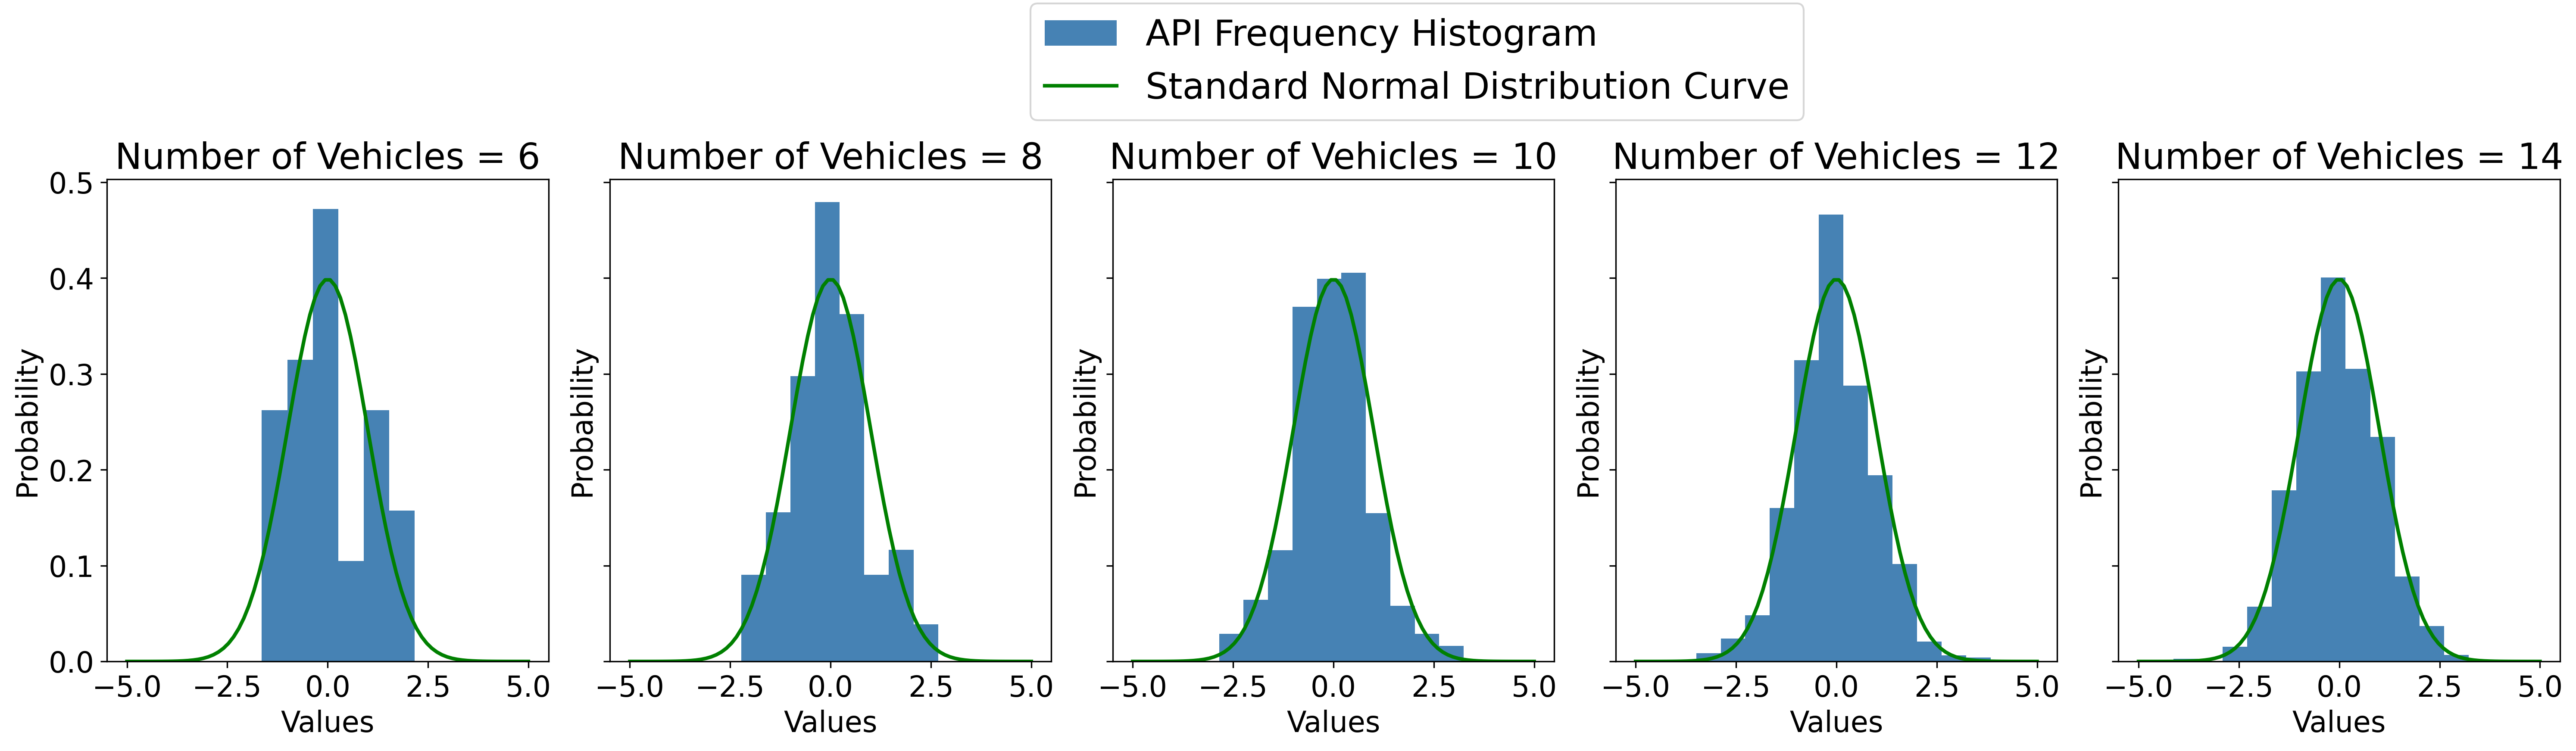

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), dpi=300, sharey=True)

for n, ax in zip(range(6, 16, 2), axes):
    data = pd.DataFrame(columns=['list', 'N', 'P', 'API', 'N00', 'N11', 'N10', 'N01', 'API_T', 'API_Mean', 'API_Var'])

    for cav in range(0, n):
        p = cav / n
        for i in generate_sequences_matrix(cav, n):
            Api = API(list(i))
            N00 = pair_counting(list(i))[0][0]
            N11 = pair_counting(list(i))[1][1]
            N10 = pair_counting(list(i))[1][0]
            N01 = pair_counting(list(i))[0][1]
            new_row = {'list': i, 'N': n, 'P': p, 'API': Api, 'N00': N00, 'N11': N11, 'N10': N10, 'N01': N01}
            data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

    data_T = data
    data_T['API'] = data_T['API'].astype(float)
    data_T = data[data['API'] >= -0.99]
    data_T = data_T[data_T['API'] <= 0.99]

    for j in range(len(data_T['API'])):
        rho = data_T.iloc[j, 3]
        data_T.iloc[j, -3] = math.atanh(rho)

    data_T.iloc[:, -2] = data_T.iloc[:, -3].mean()
    data_T.iloc[:, -1] = data_T.iloc[:, -3].std()

    for j in range(len(data_T['API'])):
        data_T.iloc[j, -3] = (data_T.iloc[j, -3] - data_T.iloc[j, -2]) / data_T.iloc[j, -1]

    hist = ax.hist(data_T['API_T'], bins=n, density=True, color="steelblue", label="API Frequency Histogram")
    u = 0
    sig = math.sqrt(1)
    x = np.linspace(u - 5 * sig, u + 5 * sig, 80)
    y = np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (math.sqrt(2 * math.pi) * sig)
    line = ax.plot(x, y, "g", linewidth=2, label='Standard Normal Distribution Curve')

    ax.set_title(f'Number of Vehicles = {n}', fontsize=20)
    ax.set_ylabel('Probability', fontsize=16)
    ax.set_xlabel('Values', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

# Create a shared legend outside the loop
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.4, 0.84), fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.85])
plt.show()

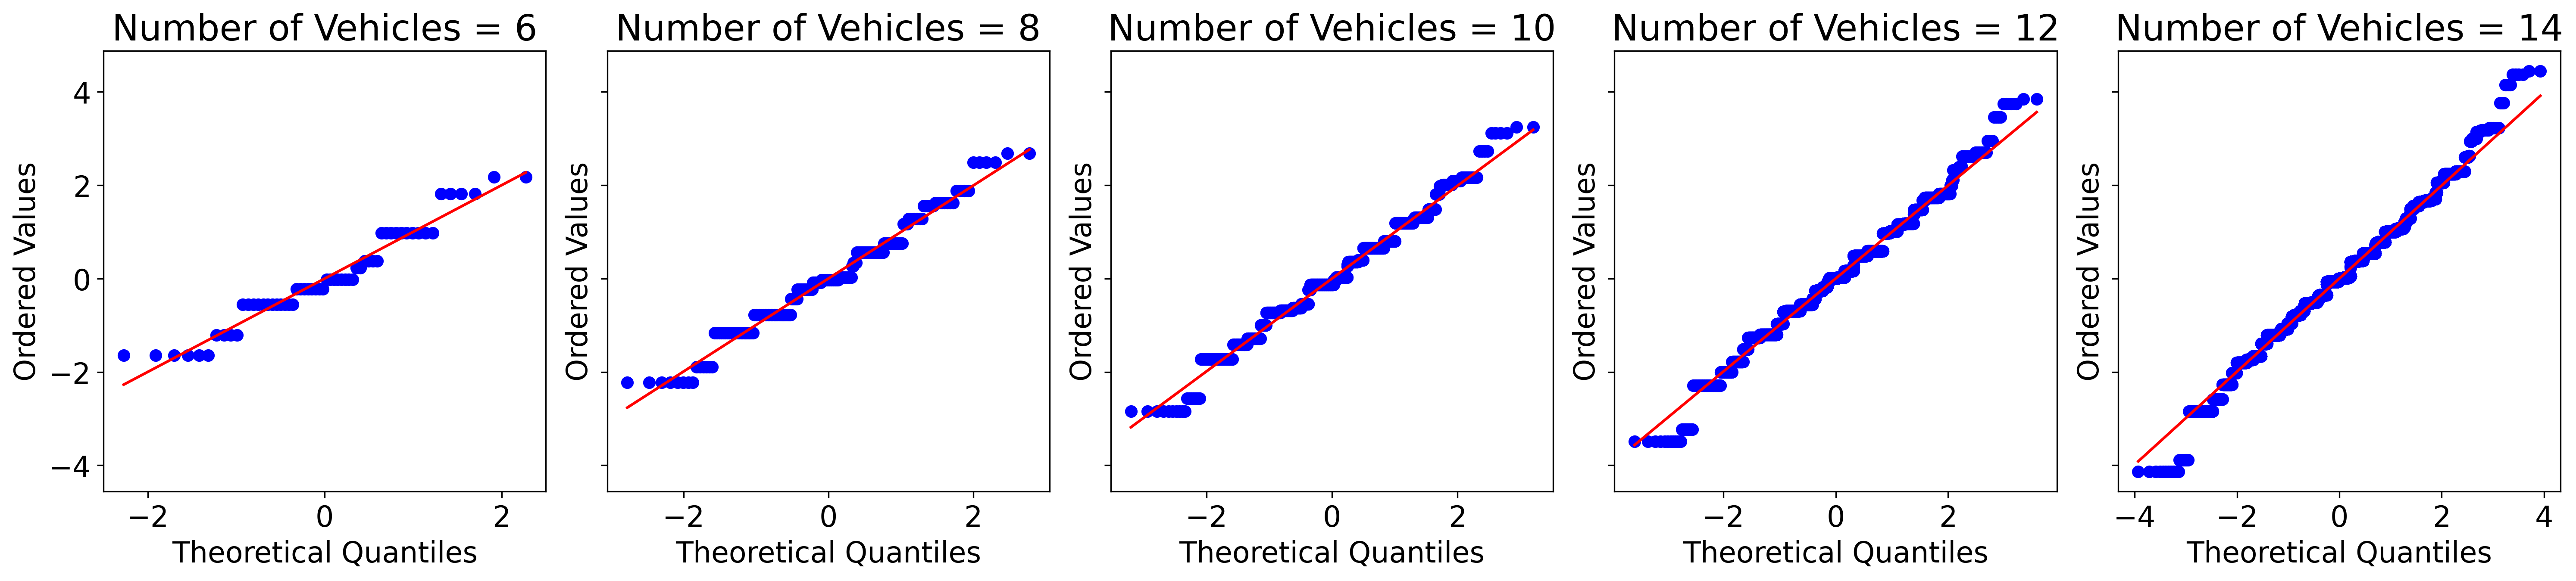

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), dpi=300, sharey=True)

# Loop to generate and plot Q-Q plots
for n, ax in zip(range(6, 16, 2), axes):
    data = pd.DataFrame(columns=['list', 'N', 'P', 'API', 'N00', 'N11', 'N10', 'N01', 'API_T', 'API_Mean', 'API_Var'])

    for cav in range(0, n):
        p = cav / n
        for i in generate_sequences_matrix(cav, n):
            Api = API(list(i))
            N00 = pair_counting(list(i))[0][0]
            N11 = pair_counting(list(i))[1][1]
            N10 = pair_counting(list(i))[1][0]
            N01 = pair_counting(list(i))[0][1]
            new_row = {'list': i, 'N': n, 'P': p, 'API': Api, 'N00': N00, 'N11': N11, 'N10': N10, 'N01': N01}
            data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

    data_T = data
    data_T['API'] = data_T['API'].astype(float)
    data_T = data[data['API'] >= -0.99]
    data_T = data_T[data_T['API'] <= 0.99]

    for j in range(len(data_T['API'])):
        rho = data_T.iloc[j, 3]
        data_T.iloc[j, -3] = math.atanh(rho)

    data_T.iloc[:, -2] = data_T.iloc[:, -3].mean()
    data_T.iloc[:, -1] = data_T.iloc[:, -3].std()

    for j in range(len(data_T['API'])):
        data_T.iloc[j, -3] = (data_T.iloc[j, -3] - data_T.iloc[j, -2]) / data_T.iloc[j, -1]

    # Create Q-Q plot
    stats.probplot(data_T['API_T'].astype('float'), dist='norm', plot=ax)
    ax.set_title(f'Number of Vehicles = {n}', fontsize=20)
    ax.set_xlabel('Theoretical Quantiles', fontsize=16)
    ax.set_ylabel('Ordered Values', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

# Adjust layout and save the combined figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()